In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.7/site-packages (0.22.2.post1)


In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dia = pd.read_csv('datasets/PimaIndians.csv')
dia.head(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif
5,5,166,72,19,175,25.8,0.587,51,positif
6,0,118,84,47,230,45.8,0.551,31,positif
7,1,103,30,38,83,43.3,0.183,33,negatif
8,1,115,70,30,96,34.6,0.529,32,positif
9,3,126,88,41,235,39.3,0.704,27,negatif


In [3]:
dia.shape

(392, 9)

In [4]:
dia.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
dia['test'] = label_encoding.fit_transform(dia['test'].astype(str))
dia.sample(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
103,12,151,70,40,271,41.8,0.742,38,1
128,1,71,78,50,45,33.2,0.422,21,0
107,7,142,60,33,190,28.8,0.687,61,0
102,9,112,82,32,175,34.2,0.260,36,1
79,0,114,80,34,285,44.2,0.167,27,0
85,8,179,72,42,130,32.7,0.719,36,1
377,0,126,86,27,120,27.4,0.515,21,0
273,1,77,56,30,56,33.3,1.251,24,0
270,0,117,66,31,188,30.8,0.493,22,0
277,3,128,72,25,190,32.4,0.549,27,1


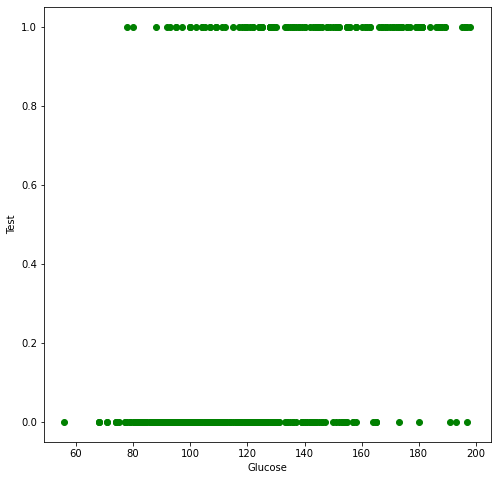

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(dia['glucose'], dia['test'], c='g')
plt.xlabel('Glucose')
plt.ylabel('Test')
plt.show()

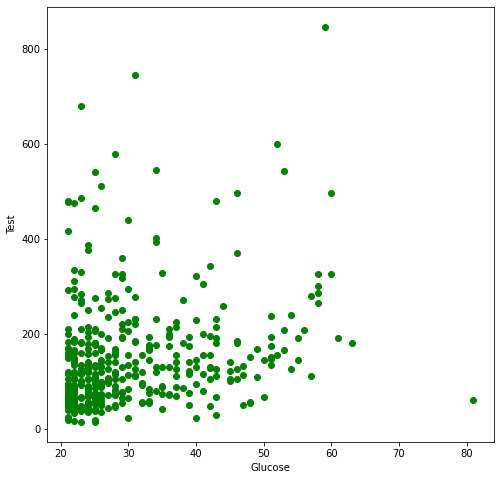

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(dia['age'], dia['insulin'], c='g')
plt.xlabel('Glucose')
plt.ylabel('Test')
plt.show()

In [10]:
dia_corr = dia.corr()
dia_corr

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
diastolic,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
test,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


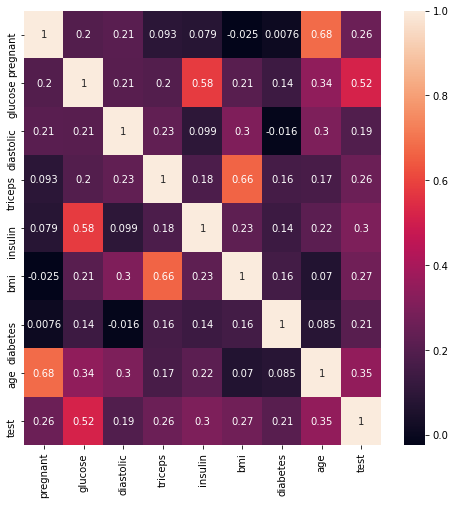

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(dia_corr, annot=True)

In [14]:
features = dia.drop('test', axis=1)
features.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59


In [15]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

In [16]:
features_scaled = standard_scaler.fit_transform(features)
features_scaled.shape

(392, 8)

In [19]:
scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
scaled_df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


In [20]:
scaled_df.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [22]:
dia_data = pd.concat([scaled_df, dia['test']], axis=1).reset_index(drop=True)
dia_data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


In [23]:
dia_data.to_csv('datasets/PimaIndians_processed.csv', index=False)

In [24]:
!ls datasets

driver_dataset.csv  insurance.csv  PimaIndians.csv  PimaIndians_processed.csv


In [25]:
from sklearn.model_selection import train_test_split

X = dia_data.drop('test', axis=1)
Y = dia_data['test']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [27]:
x_train.shape, y_train.shape

((274, 8), (274,))

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1])

In [36]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
pred_results.head(10)

,y_test,y_pred
111,0,0
183,1,0
374,1,0
198,0,0
383,0,0
49,1,0
206,1,1
4,1,1
360,0,0
45,0,0


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [39]:
model_acc = accuracy_score(y_test, y_pred)
model_pre = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("Accuracy of the model is {}%".format(model_acc * 100))
print("Precision of the model is {}%".format(model_pre * 100))
print("Recall of the model is {}%".format(model_recall * 100))

Accuracy of the model is 82.20338983050848%
Precision of the model is 72.72727272727273%
Recall of the model is 66.66666666666666%


In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1])

In [42]:
model_acc = accuracy_score(y_test, y_pred)
model_pre = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("Accuracy of the model is {}%".format(model_acc * 100))
print("Precision of the model is {}%".format(model_pre * 100))
print("Recall of the model is {}%".format(model_recall * 100))

Accuracy of the model is 82.20338983050848%
Precision of the model is 68.29268292682927%
Recall of the model is 77.77777777777779%


In [43]:
dia_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
dia_crosstab

y_test,0,1
y_pred,,
0,73,12
1,9,24


In [44]:
TP = dia_crosstab[1][1]
TN = dia_crosstab[0][0]
FP = dia_crosstab[0][1]
FN = dia_crosstab[1][0]

In [45]:
acc_score_ver = (TP + TN) / (TP + FP + TN + FN)
acc_score_ver

0.8220338983050848

In [48]:
pre_score_survived = TP / (TP + FP)
pre_score_survived

0.7272727272727273

In [49]:
recall_score_survived = TP / (TP + FN)
recall_score_survived

0.6666666666666666